In [34]:
from pytrends.request import TrendReq
from pytrends import dailydata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:

# Create a pytrends object
#pytrends = TrendReq(hl='fr-FR', tz=360) #set the language to French and the timezone to ?? #chatgpt explained below

#This commented out block is the default way of extracting data (gives weekly data)
'''
search_term = "covid-19"

# Set the time range
start_date = "2020-01-01"
end_date = "2023-01-01"  # or any date in 2023

# Build the payload
pytrends.build_payload(kw_list=[search_term], timeframe=f'{start_date} {end_date}')

# Get the interest over time data
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df.to_csv('covid_data.txt', index=True, header=True) #arg: mode='a' to append
print(interest_over_time_df['covid-19'].head())
'''

# Fetch data by day instead of Google's default weekly data
pytrend = TrendReq()
search_term = 'covid-19'
#daily_data = dailydata.get_daily_data(search_term, start_year=2020, start_mon=1, stop_year=2023, stop_mon=1, geo='FR')
#daily_data.to_csv('daily_covid19_data.txt', index=True, header=True) #arg: mode='a' to append

'''
syntax from doc for daily data -https://github.com/GeneralMills/pytrends/blob/master/pytrends/dailydata.py#L48
def get_daily_data(word: str,
                 start_year: int,
                 start_mon: int,
                 stop_year: int,
                 stop_mon: int,
                 geo: str = 'US',
                 verbose: bool = True,
                 wait_time: float = 5.0) -> pd.DataFrame:
Args:
    word (str): Word to fetch daily data for.
    start_year (int): the start year
    start_mon (int): start 1st day of the month
    stop_year (int): the end year
    stop_mon (int): end at the last day of the month
    geo (str): geolocation
    verbose (bool): If True, then prints the word and current time frame
        we are fecthing the data for.


The TrendReq object in the pytrends library is used to make requests to the Google Trends API and retrieve search interest data. 
The parameters you provided when initializing TrendReq(hl='fr-FR', tz=360) have specific meanings:

hl='fr-FR': This parameter specifies the "Host Language" or the language for the Google Trends interface. 
In this case, it is set to 'fr-FR', which represents French as spoken in France. 
This means that the interface language used for retrieving trends data will be in French.

tz=360: This parameter specifies the timezone offset, which is set to 360. 
The timezone offset is given in minutes, and 360 minutes correspond to 6 hours. 
This means that the data retrieved will be adjusted for the time zone offset of 6 hours. 
In this case, it is used to account for the time difference between the UTC (Coordinated Universal Time) and the local time in the specified location (France).

In summary, when you initialize TrendReq(hl='fr-FR', tz=360), 
you are configuring the pytrends object to make requests to the Google Trends API as if the user is in France, 
using the French language interface, 
and adjusting the time data to the local time zone of France (which is typically Central European Time, CET, with a UTC offset of +1 hour, or Central European Summer Time, CEST, with a UTC offset of +2 hours during daylight saving time). 

The tz parameter helps ensure that the time data received is appropriate for the specified location.
'''
import warnings
warnings.filterwarnings("ignore")

<span style="font-size:24px">Narrowing covid data and to the relevant columns</span>

In [36]:
covid = pd.read_csv('./data/owid-covid-data.csv')
covid2 = covid[['location', 'date', 'total_cases', 'new_cases', 'new_deaths', 'new_cases_per_million','new_deaths_per_million', 'positive_rate', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million']]
covidFrance = covid2[covid2['location'] == "France"]
#print(covidFrance.loc[104326:104380,'new_cases_per_million'])
#1358 is the number of entries or days for France
# Create a new numerical index for the x-axis
covidFrance['numerical_date'] = np.arange(len(covidFrance)) #1358 is the length
# Create percentage columns (1 to 100%) for easy to read graphs
max_new_cases = covidFrance['new_cases'].max()
max_new_deaths = covidFrance['new_deaths'].max()
covidFrance['new_cases'] = covidFrance['new_cases'].replace(0, method='ffill') #fill in 0's when no data from last non zero new_cases

covidFrance['new_deaths'] = covidFrance['new_deaths'].replace(0, method='ffill') #same
covidFrance['new_cases_percentage'] = (covidFrance['new_cases'] / max_new_cases) * 100 
covidFrance['new_deaths_percentage'] = (covidFrance['new_deaths'] / max_new_deaths) * 100

<span style="font-size:24px"> Modying google trends data

In [37]:
google = pd.read_csv("./data/pytrends_data/google_trends.csv")
google['numerical_date'] = np.arange(len(google))*8
google['week_numerical_date'] = np.arange(len(google))
#somehow weekly_covid_france has the same number of weeks as google data, hurray!
google['France'] = pd.to_numeric(google['France'], errors='coerce')
#print(google['France'])

#for key in keywords:
#    key['numerical_date'] = np.arange(len(key))*8
#    key['week_numerical_date'] = np.arange(len(key))
#    #somehow weekly_covid_france has the same number of weeks as google data, hurray!
#    key['France'] = pd.to_numeric(key['France'], errors='coerce')

<span style="font-size:24px">Creating weekly covid france table.

In [38]:
covidFrance.reset_index(inplace=True, drop=True)
#print(covidFrance.iloc[702, :]) #702 has non zero per million
#new_week = covidFrance.iloc[2::7]
#covidFrance
#print(new_week.iloc[70, :])
weekly_covid_france = covidFrance.iloc[2::7]
#print(weekly_covid_france.iloc[50, :])
weekly_covid_france['week_numerical_date'] = np.arange(len(weekly_covid_france))
#below code is messy, i wanted to set a new index, so number of week is the index, but i also kept a column with the same info
weekly_covid_france.drop(columns=['location'], inplace=True)
weekly_covid_france.set_index('week_numerical_date', inplace=True)
weekly_covid_france.reset_index(inplace=True)
print(weekly_covid_france.columns)
#print(weekly_covid_france.head())
#print(weekly_covid_france.tail())
#print(google.columns)
#print(google.head())
#print(google.tail())
print(weekly_covid_france['new_cases'])


Index(['week_numerical_date', 'date', 'total_cases', 'new_cases', 'new_deaths',
       'new_cases_per_million', 'new_deaths_per_million', 'positive_rate',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million',
       'numerical_date', 'new_cases_percentage', 'new_deaths_percentage'],
      dtype='object')
0         0.0
1         0.0
2         0.0
3         3.0
4         3.0
        ...  
189    7982.0
190    7982.0
191    7982.0
192    7982.0
193    7982.0
Name: new_cases, Length: 194, dtype: float64


<span style="font-size:24px">Graphing France covid data vs google api trends</span>

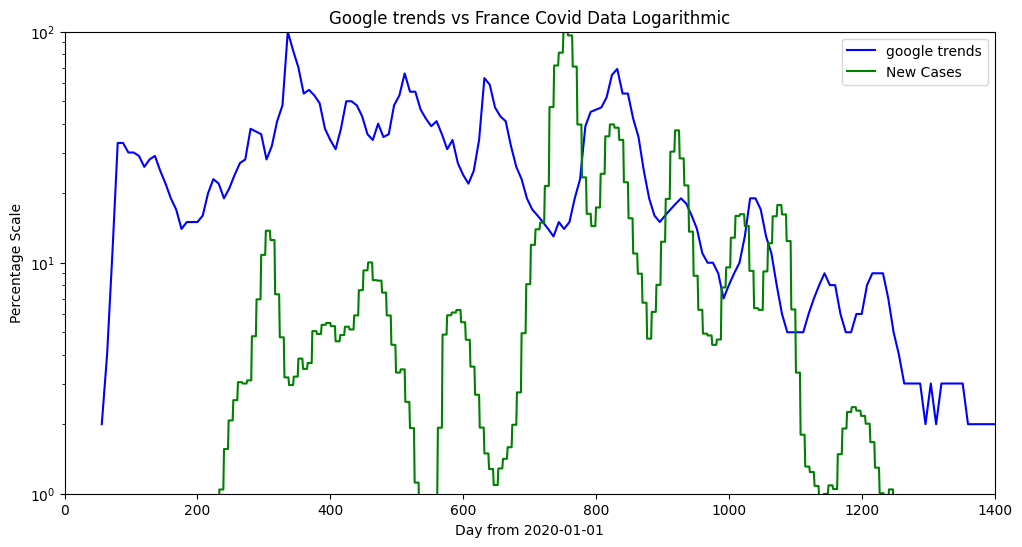

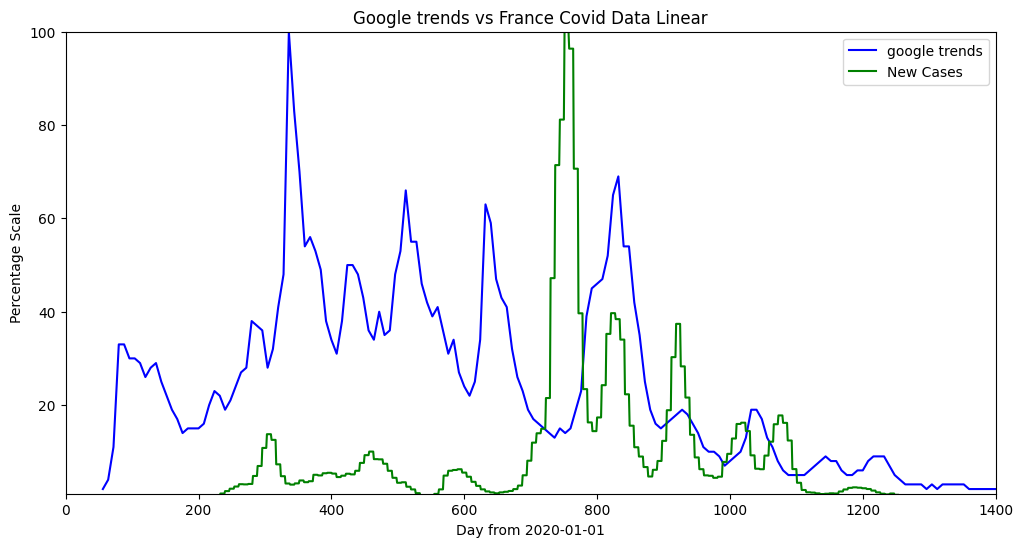

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(google['numerical_date'], google['France'], label='google trends', color='blue')
plt.plot(covidFrance['numerical_date'], covidFrance['new_cases_percentage'], label='New Cases', color='green')
plt.yscale('log')
plt.ylim(1, 100)
plt.xlim([0, 1400])
plt.xlabel('Day from 2020-01-01')
plt.ylabel('Percentage Scale')
plt.title('Google trends vs France Covid Data Logarithmic')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(google['numerical_date'], google['France'], label='google trends', color='blue')
plt.plot(covidFrance['numerical_date'], covidFrance['new_cases_percentage'], label='New Cases', color='green')
plt.yscale('linear')
plt.ylim(1, 100)
plt.xlim([0, 1400])
plt.xlabel('Day from 2020-01-01')
plt.ylabel('Percentage Scale')
plt.title('Google trends vs France Covid Data Linear')
plt.legend()
plt.show()

     location        date  total_cases  new_cases  new_deaths  \
0      France  2020-01-03          NaN        0.0         0.0   
7      France  2020-01-10          NaN        0.0         0.0   
14     France  2020-01-17          NaN        0.0         0.0   
21     France  2020-01-24          NaN        0.0         0.0   
28     France  2020-01-31          3.0        3.0         0.0   
...       ...         ...          ...        ...         ...   
1323   France  2023-08-18   38997490.0     7982.0        62.0   
1330   France  2023-08-25   38997490.0     7982.0        62.0   
1337   France  2023-09-01   38997490.0     7982.0        62.0   
1344   France  2023-09-08   38997490.0     7982.0        62.0   
1351   France  2023-09-15   38997490.0     7982.0        62.0   

      new_cases_per_million  new_deaths_per_million  positive_rate  \
0                       0.0                     0.0            NaN   
7                       0.0                     0.0            NaN   
14       

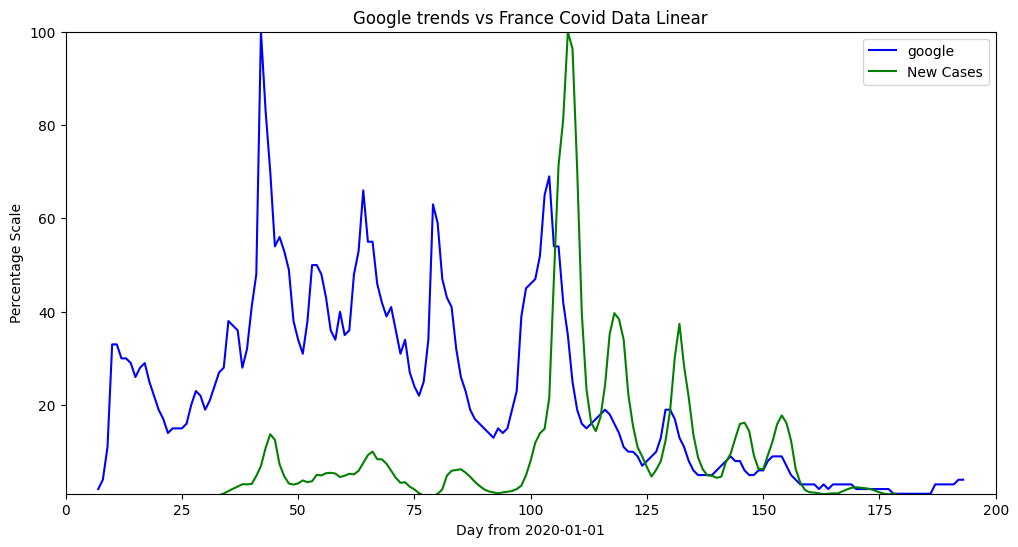

In [40]:
google['week_numerical_date'] = np.arange(len(google))
weekly_covid_france = covidFrance.iloc[::7]
#print(covidFrance)
weekly_covid_france['week_numerical_date'] = np.arange(len(weekly_covid_france))
print(weekly_covid_france)
#print(google)
plt.figure(figsize=(12, 6))
plt.plot(google['week_numerical_date'], google['France'], label='google', color='blue')
plt.plot(weekly_covid_france['week_numerical_date'], weekly_covid_france['new_cases_percentage'], label='New Cases', color='green')
plt.yscale('linear')
plt.ylim(1, 100)
plt.xlim([0, 200])
plt.xlabel('Day from 2020-01-01')
plt.ylabel('Percentage Scale')
plt.title('Google trends vs France Covid Data Linear')
plt.legend()
plt.show()

<span style="font-size:24px"> Daily New Cases in France against Pytrends Daily Data</span>
As can be seen, python data is daily (nice), but covid data is weekly anyway

Index(['date', 'covid_unscaled', 'covid_monthly', 'isPartial', 'scale',
       'covid', 'numerical_date'],
      dtype='object')


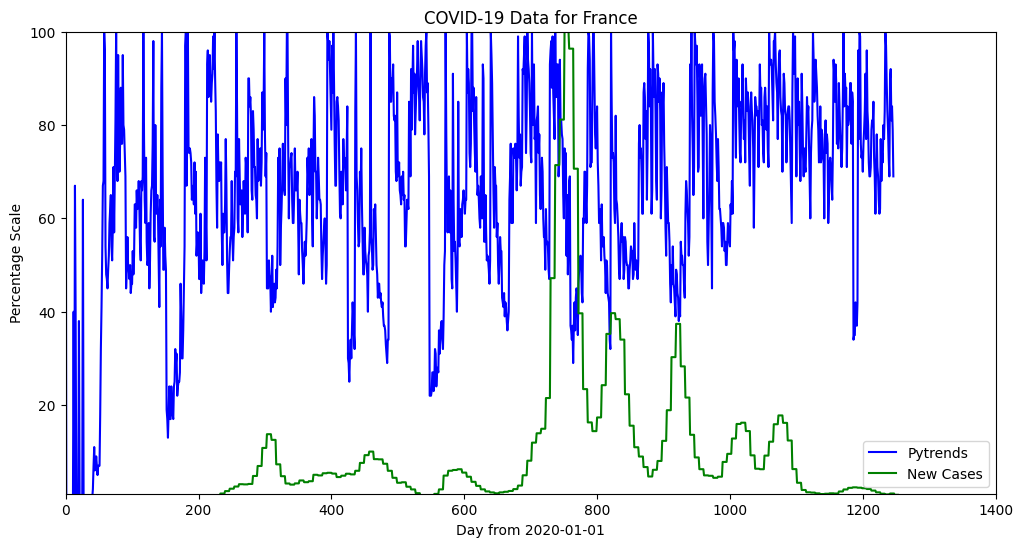

In [41]:
pytrends = pd.read_csv('./data/pytrends_data/daily_covid_data.txt')
#print(daily_data.head(daily_data.shape[0])) #print all columns
#plt.plot(daily_data['date'], daily_data['covid-19'], label='New Cases', color='green')
pytrends['numerical_date'] = np.arange(len(pytrends))

plt.figure(figsize=(12, 6))
covidFrance = covidFrance.reset_index(drop=True)
print(pytrends.columns)

plt.plot(pytrends['numerical_date'], pytrends['covid_unscaled'], label='Pytrends', color='blue')
plt.plot(covidFrance.index, covidFrance['new_cases_percentage'], label='New Cases', color='green')

plt.ylim(1, 100)
plt.xlim([0, 1400])
plt.xlabel('Day from 2020-01-01')
plt.ylabel('Percentage Scale')
plt.title('COVID-19 Data for France')
plt.legend()    
plt.show()

<span> Correlation coefficient between Pytrends data and covid cases </span>

In [42]:
correlation_coefficient = pytrends['covid_unscaled'].corr(covidFrance['new_cases'])
print(correlation_coefficient)

0.0010994065725866327


<span style="font-size:18px">A peak inside covidFrance Data</span>

In [43]:
start_day = 300
end_day = 400
covidFrance_filtered = covidFrance[(covidFrance.index >= start_day) & (covidFrance.index <= end_day)]
covidFrance_filtered['new_cases'] = covidFrance_filtered['new_cases'].replace(0, method='ffill')

pytrends_filtered = pytrends[(pytrends.index >= start_day) & (pytrends.index <= end_day)]
pd.set_option('display.max_rows', 10)  # None sets it to display all rows
covidFrance_filtered

,location,date,total_cases,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,positive_rate,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,numerical_date,new_cases_percentage,new_deaths_percentage
300,France,2020-10-29,1008331.0,261329.0,1774.0,0.000,0.000,0.156,NaN,NaN,NaN,NaN,300,10.811930,31.667262
301,France,2020-10-30,1008331.0,261329.0,1774.0,0.000,0.000,0.156,NaN,NaN,NaN,NaN,301,10.811930,31.667262
302,France,2020-10-31,1008331.0,261329.0,1774.0,0.000,0.000,0.155,NaN,NaN,NaN,NaN,302,10.811930,31.667262
303,France,2020-11-01,1340836.0,332505.0,3154.0,5145.016,48.803,0.155,24676.398,4.86,27.43,382.69818,303,13.756685,56.301321
304,France,2020-11-02,1340836.0,332505.0,3154.0,0.000,0.000,0.155,NaN,NaN,NaN,NaN,304,13.756685,56.301321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,France,2021-02-02,2931084.0,132624.0,3159.0,0.000,0.000,0.061,NaN,NaN,NaN,NaN,396,5.487035,56.390575
397,France,2021-02-03,2931084.0,132624.0,3159.0,0.000,0.000,0.060,NaN,NaN,NaN,NaN,397,5.487035,56.390575
398,France,2021-02-04,2931084.0,132624.0,3159.0,0.000,0.000,0.060,NaN,NaN,NaN,NaN,398,5.487035,56.390575
399,France,2021-02-05,2931084.0,132624.0,3159.0,0.000,0.000,0.059,NaN,NaN,NaN,NaN,399,5.487035,56.390575


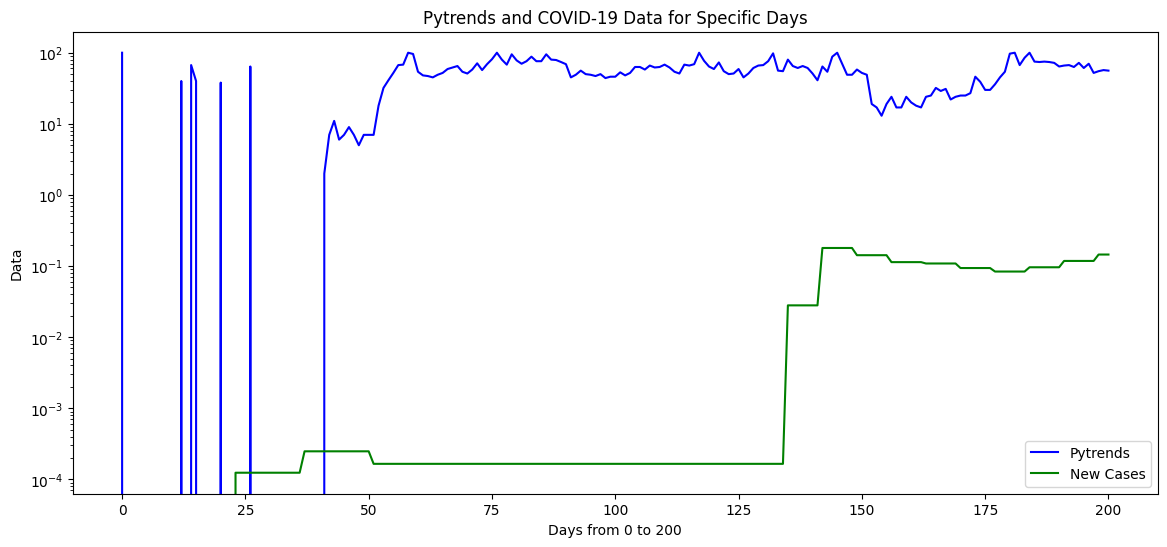

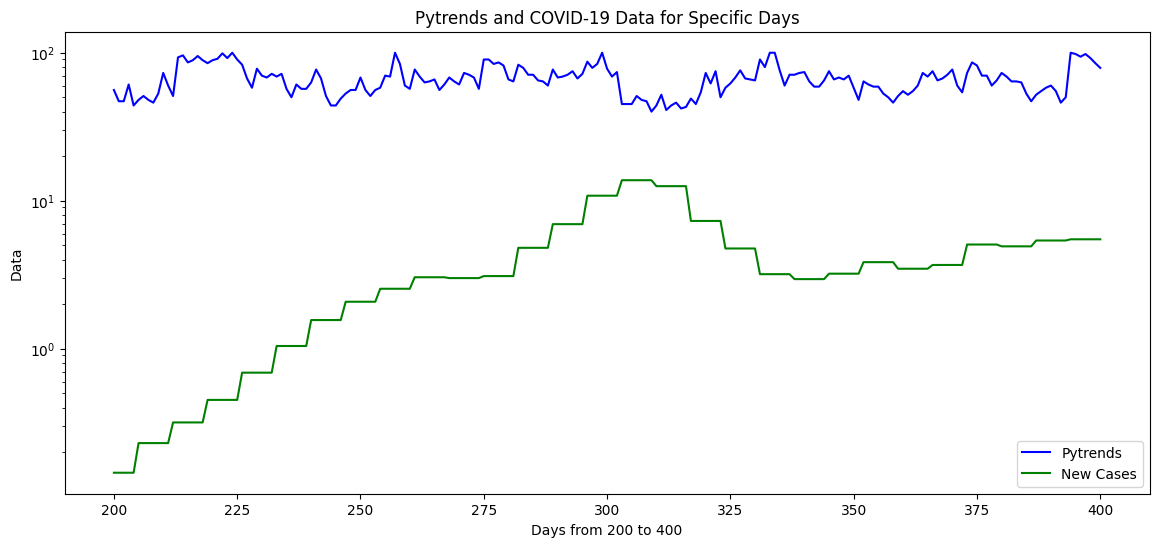

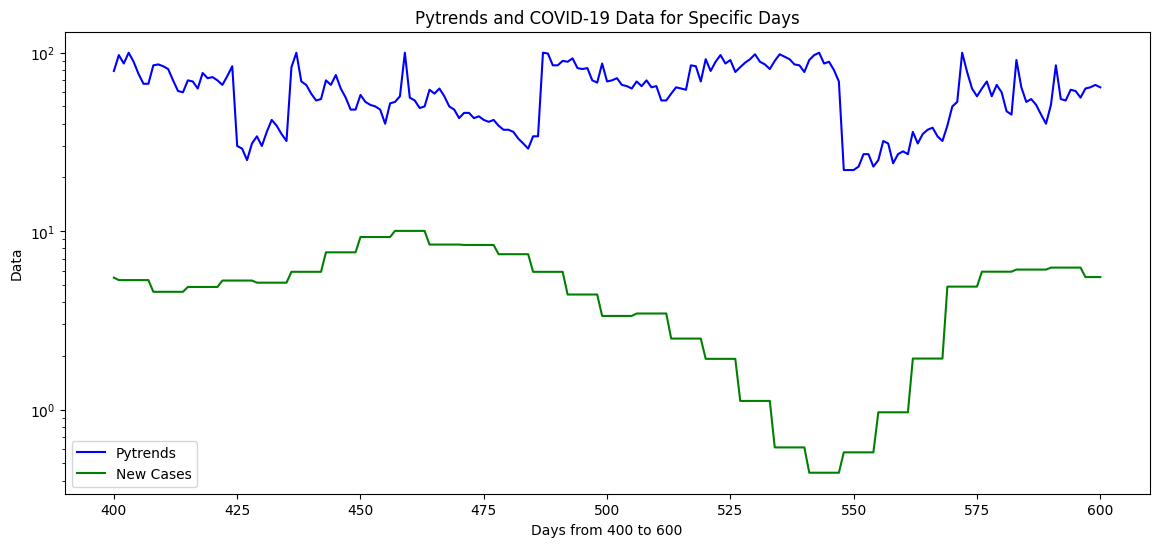

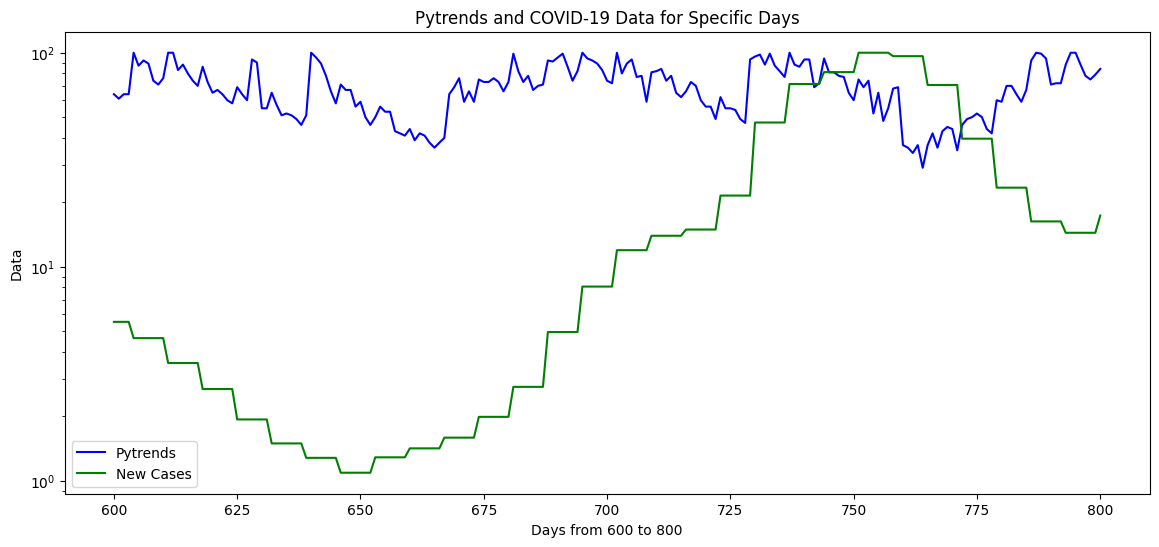

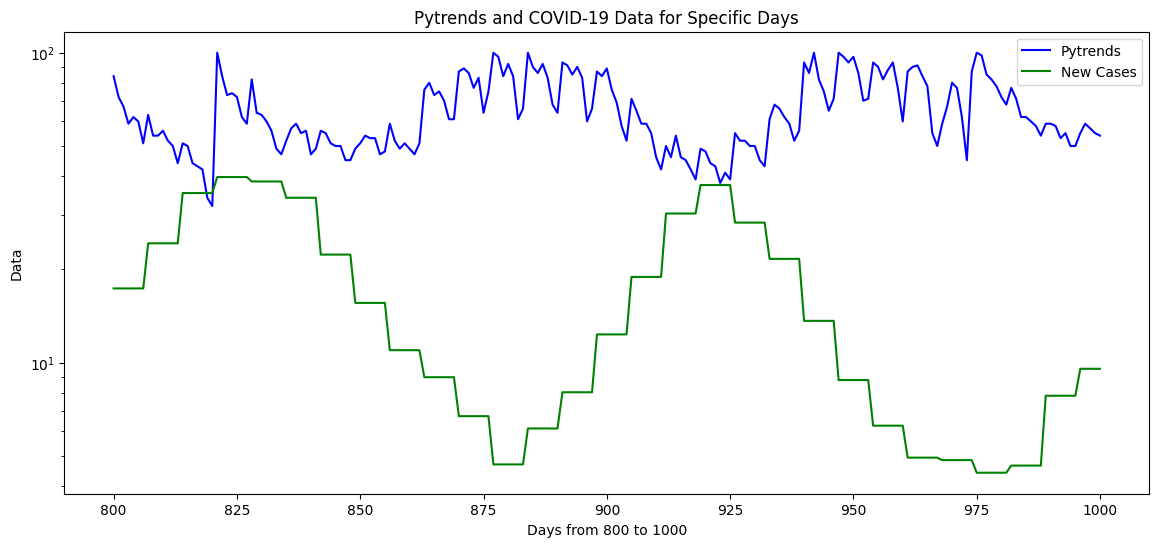

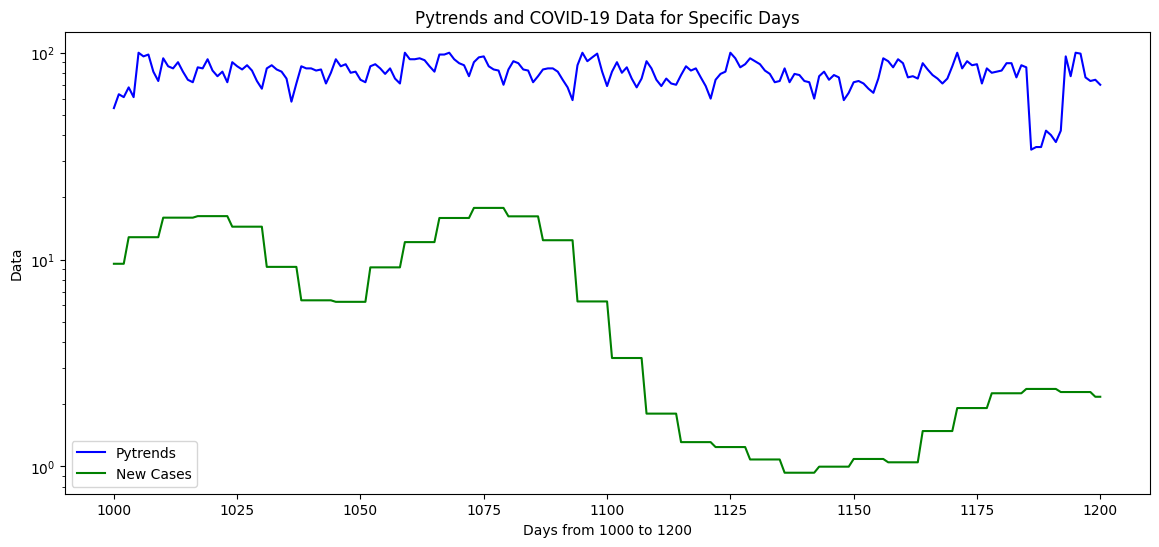

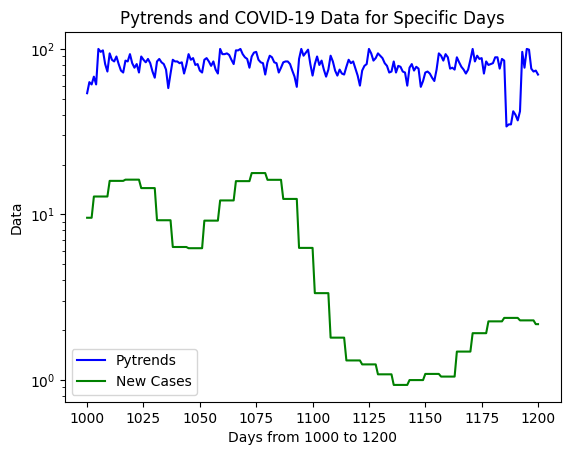

In [44]:

#fig, axs = plt.subplots(2, 1, figsize=(12, 8))


# Filter the COVID-19 data for specific days (e.g., days 200 to 400)
start_day = 200
end_day = 400
covidFrance_filtered = covidFrance[(covidFrance.index >= start_day) & (covidFrance.index <= end_day)]
pytrends_filtered = pytrends[(pytrends.index >= start_day) & (pytrends.index <= end_day)]
# Create a single subplot
#plt.figure(figsize=(12, 6))

figure_size = (14, 6) 
for i in range(0,6):
    start_day = i*200
    end_day = i*200+200
    covidFrance_filtered = covidFrance[(covidFrance.index >= start_day) & (covidFrance.index <= end_day)]
    pytrends_filtered = pytrends[(pytrends.index >= start_day) & (pytrends.index <= end_day)]
    plt.figure(figsize=figure_size)
    plt.plot(pytrends_filtered.index, pytrends_filtered['covid_unscaled'], label='Pytrends', color='blue')
    plt.plot(covidFrance_filtered.index, covidFrance_filtered['new_cases_percentage'], label='New Cases', color='green')
    plt.xlabel(f'Days from {start_day} to {end_day}')
    plt.ylabel('Data')
    plt.title('Pytrends and COVID-19 Data for Specific Days')
    plt.legend()
    plt.yscale('log')
    plt.show()

plt.plot(pytrends_filtered.index, pytrends_filtered['covid_unscaled'], label='Pytrends', color='blue')
plt.plot(covidFrance_filtered.index, covidFrance_filtered['new_cases_percentage'], label='New Cases', color='green')
plt.xlabel(f'Days from {start_day} to {end_day}')
plt.ylabel('Data')
plt.title('Pytrends and COVID-19 Data for Specific Days')
plt.legend()
plt.yscale('log')
